# Factors Influencing the Modelling of Customer Churn

Maximising customer lifetime value, and thus minimising churn, is crucial for telecommunication (“Telco”) businesses (Evolving Systems, 2020) as high customer acquisition costs (“CAC”) – approximately $340 per customer (Hastings, n.d.) – are not immediately recouped. Thus, Telcos must place emphasis on retaining customers and predicting churn. Using data from an unnamed British telco, churn is modelled and predicted using a Random Forest model. Resultantly, the strongest predictors of customer churn are identified.

## Importing necessary libraries

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

## Data Reading

In [288]:
dfA = pd.read_csv('Company A - Data.csv')
dfA.drop('Unnamed: 0', axis=1, inplace=True)

As a first step, we have an overview of the data, as well as checking for any missing values

In [184]:
dfA.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [19]:
dfA.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Exploratory Analysis

### Categoriacal Attributes

To not have an overpopulated plot, I have identified 3 different groups we will divide our attributes into.

1. Attributes that dont seem to influence customer churn too much

2. Attributes which seem to have an influence, with just 2 categories

3. Attributes which seem to have an influence, with just 3 categories

In [146]:
df_nodiff = ['gender','PhoneService','MultipleLines']
df_2cats = ['SeniorCitizen','Partner','Dependents','PaperlessBilling']
df_rest = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
           'Contract', 'PaymentMethod']

#Function to plot stacked percentage bar charts
#dfA[['Churn','gender']].groupby(['gender','Churn']).size().groupby(level=0).transform(lambda x: x/x.sum()).unstack().plot(kind='bar', stacked=True)

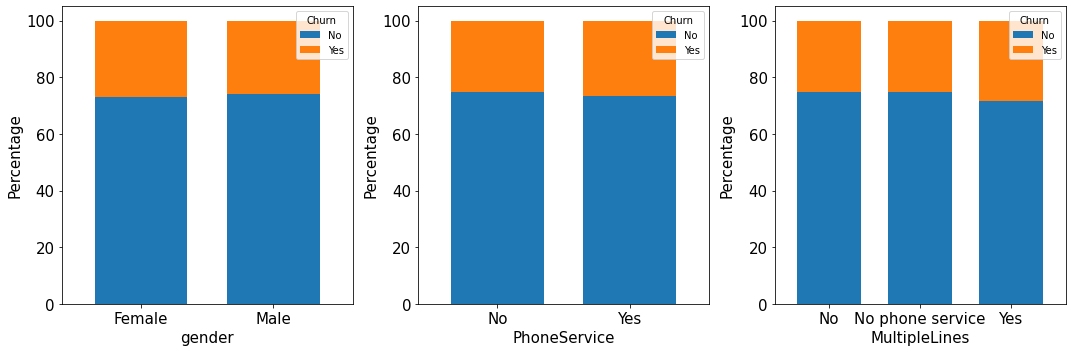

In [186]:
plot_number = 1
plt.figure(figsize=(15,5))
for i in df_nodiff:
    ax = plt.subplot(1, 3, plot_number)
    dfA[['Churn',i]].groupby([i,'Churn']).size().groupby(level=0).transform(lambda x: (x/x.sum())*100).unstack().plot(kind='bar', stacked=True, ax=ax, width=0.7)
    ax.tick_params(axis='both', which='major', labelsize=15, rotation=0)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

We can observe that Gender, Phone Service and Multiple Lines dont seem to have much of an influence wether a customer churns or not

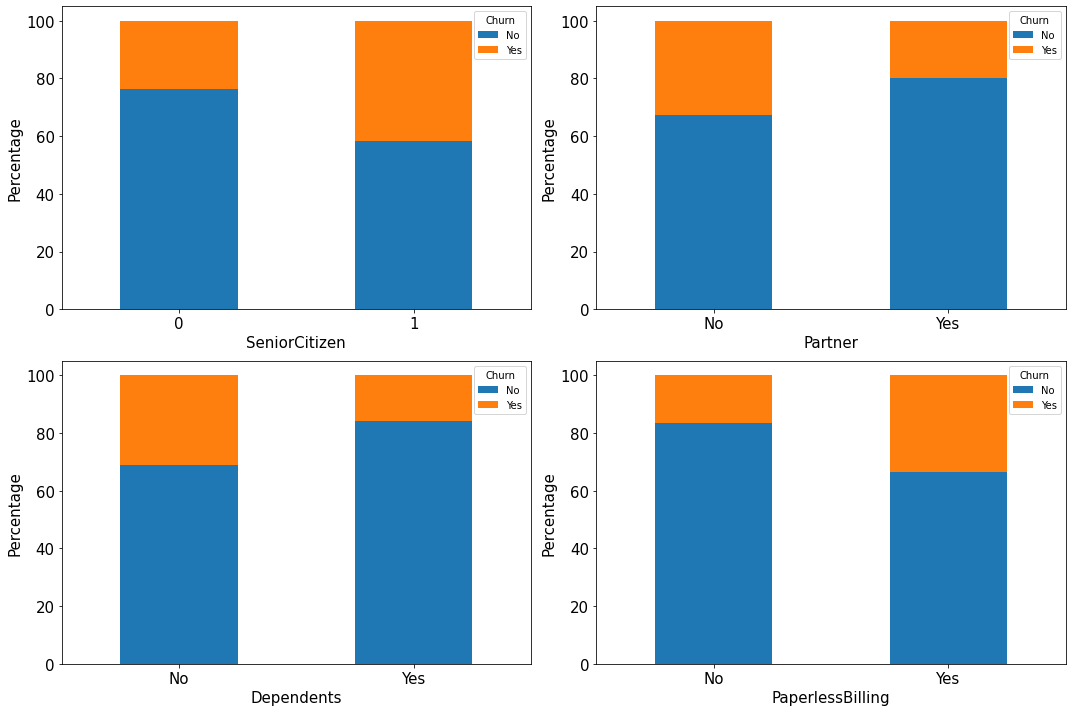

In [185]:
plot_number = 1
plt.figure(figsize=(15,10))
for i in df_2cats:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(2, 2, plot_number)
    dfA[['Churn',i]].groupby([i,'Churn']).size().groupby(level=0).transform(lambda x: (x/x.sum())*100).unstack().plot(kind='bar', stacked=True, ax=ax)
    ax.tick_params(axis='both', which='major', labelsize=15, rotation=0)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1
plt.tight_layout()

Senior Citizen, Partner, Dependents and Paperless Billing seem to have a major influence wether a cusotmer will churn.

It is clearly seen that customers on the Yes category on all these attributes seem to have twice the probability to churn

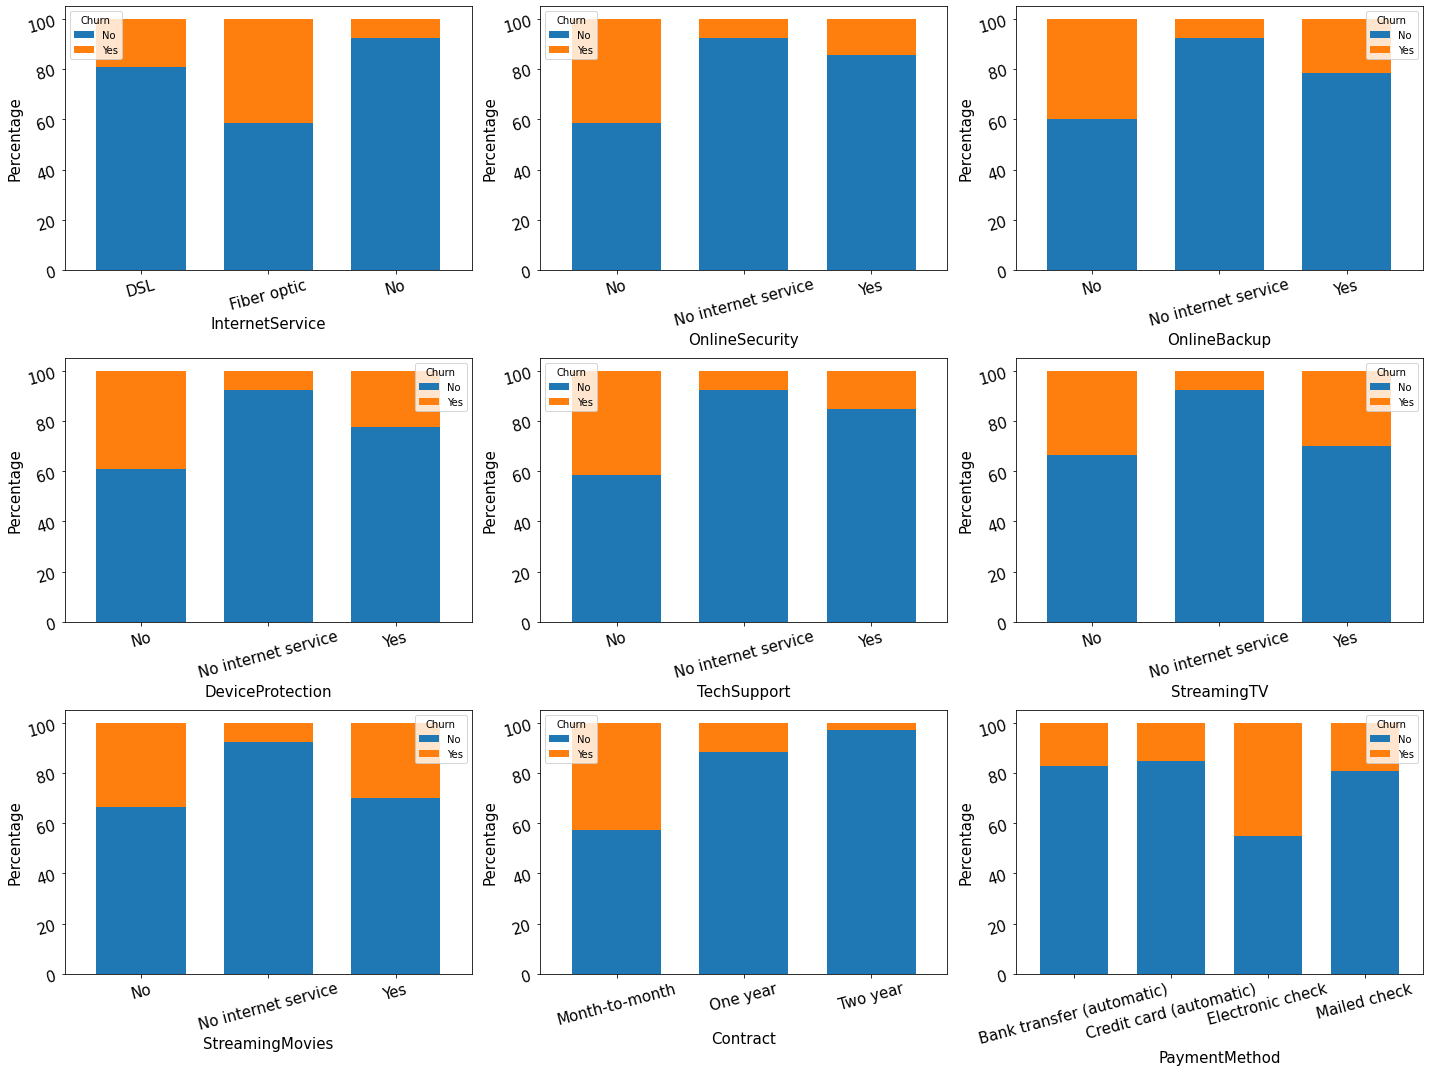

In [187]:
plot_number = 1
plt.figure(figsize=(20,15))
for i in df_rest:
    # Inside of an image that's a 15x13 grid, put this
    # graph in the in the plot_number slot.
    ax = plt.subplot(3, 3, plot_number)
    dfA[['Churn',i]].groupby([i,'Churn']).size().groupby(level=0).transform(lambda x: (x/x.sum())*100).unstack().plot(kind='bar', stacked=True, ax=ax, width=0.7)
    ax.tick_params(axis='both', which='major', labelsize=15, rotation=15)
    plt.xlabel(i, fontsize=15)
    plt.ylabel('Percentage', fontsize=15)
    # Go to the next plot for the next loop
    plot_number = plot_number + 1


plt.tight_layout()

A significant categorical variable appears to be Contract, where those on a month-to-month contract are approximately four times and 14 times more likely to churn than those on a one-year and two-year contract, respectively. Moreover, customers’ choices for different Internet Service (fibre optic), Online Security (no), and Tech Support (no) offerings has significant influence on the likelihood of churn.

### Numerical Attributes

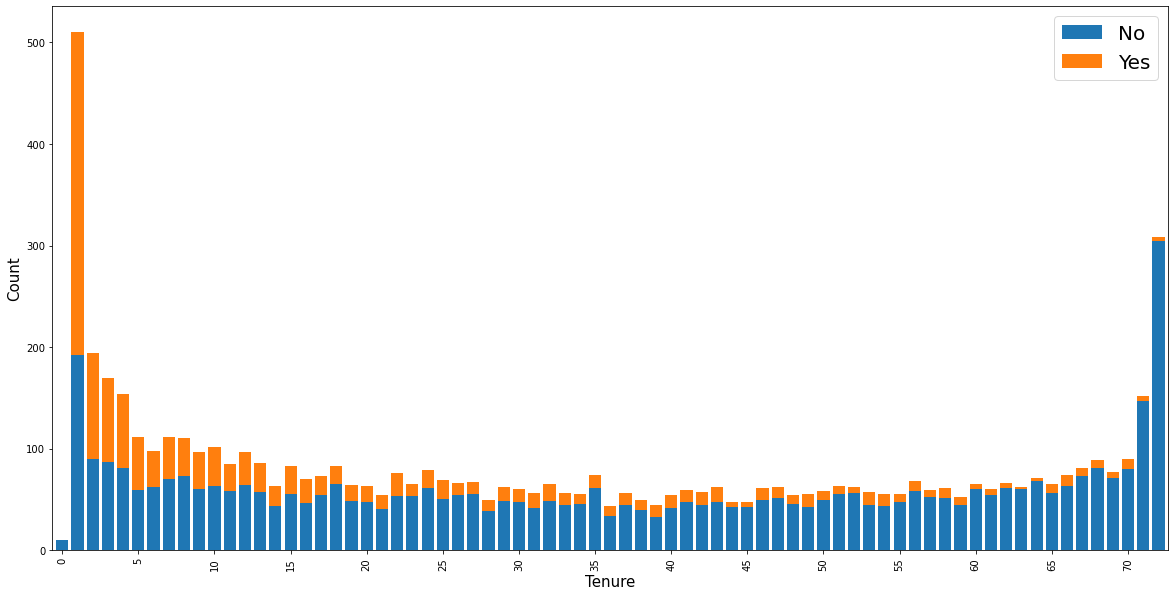

In [234]:
dfA.groupby(['tenure', 'Churn']).size().reset_index().pivot(columns='Churn', index='tenure', values=0).plot(kind='bar', stacked=True, figsize=(20,10), width=0.8)
plt.xlabel('Tenure', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.legend(fontsize=20)
plt.xticks(np.arange(min(dfA['tenure']), max(dfA['tenure']), 5.0));

Its clear that new clients are more likely to churn. In telecommunication companies this is a big problem, as a certain tenure is needed before profits are made from a client.

### Defining a function to do some cleaning

In [285]:
def fix_data(x):
    x = x.replace(r'^\s*$', 0, regex=True)
    x['TotalCharges'] = pd.to_numeric(x['TotalCharges'])
    
    x.gender.replace(('Male', 'Female'), (1, 0), inplace=True)
    x.Partner.replace(('Yes', 'No'), (1, 0), inplace=True)
    x.Dependents.replace(('Yes', 'No'), (1, 0), inplace=True)
    x.PhoneService.replace(('Yes', 'No'), (1, 0), inplace=True)
    x.PaperlessBilling.replace(('Yes', 'No'), (1, 0), inplace=True)
    x.Churn.replace(('Yes', 'No'), (1, 0), inplace=True)
    x.dropna(axis=0, inplace=True)
    return(x)

We fit our data to the function we created above, mostly replacing binary categories for 1s and 0s for ease of modelling

In the next step we drop TotalCharges as its directly correlated to tenure*MonthlyCharges and CustomerID as it doesnt really add much

We also divide our data into X and y datasets for the modelling

In [289]:
dfA = fix_data(dfA)

X = dfA.drop(['Churn','customerID','TotalCharges'], axis=1)
y = dfA['Churn']

In [291]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

### Encoding the rest of our category variables

In [292]:
X = MultiColumnLabelEncoder(columns = ['MultipleLines','InternetService','OnlineSecurity', 'OnlineBackup',
                                  'DeviceProtection', 'TechSupport','StreamingTV','StreamingMovies',
                                   'Contract','PaymentMethod']).fit_transform(X)

In [294]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.10
1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.15
2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,74.95
3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.90
4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.45


## Modelling

Random Forest Classifier was chosen as the model. This model is an ensemble method, which trades more bias for a lower variance.  Random Forests are also able to deal with categorical data and have the bonus of outputing Feature Importance too, which will be useful when analysing why customers are churning.

As we will perform a grid search for best parameters, this automatically does a cross validation within the training data

Also we stratify our target variable for the train and test split.

In [295]:
X_train, X_test, y, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

We scale the data for a better modelling

In [296]:
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

We import the necessary libraries to perform the GridSearch and RandomForest

In [297]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

We create out 5 folds for the validation

In [298]:
cv = StratifiedKFold(n_splits=5)
cv.get_n_splits(train_scaled, y)

5

We perform the gridsearch to find out the best hyperparameter

In [299]:
model = RandomForestClassifier()
parameters = {'n_estimators': [80,85,90,100,105,110],
              'criterion': ['gini'],
              'min_samples_split': [2,3,4],
              'min_samples_leaf': [1,2,4,5,6,7],
              'max_features': ['auto','sqrt','log2']
             }

search = GridSearchCV(model, param_grid=parameters, cv=cv, scoring='accuracy', n_jobs = -1)
result = search.fit(train_scaled, y)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


In [300]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8055575552516017
Best Hyperparameters: {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 105}


Best hyperparameters for our case:

Best Score: 0.8040957410837188

Best Hyperparameters: {'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}

Next, we fit our model with the hyperparameters found previously

In [301]:
RFC = RandomForestClassifier(criterion='gini', 
                             max_features='auto', 
                             min_samples_leaf=7, 
                             min_samples_split=3, 
                             n_estimators=105)

RFC.fit(train_scaled, y)

RandomForestClassifier(min_samples_leaf=7, min_samples_split=3,
                       n_estimators=105)

We predict the testing data and print metrics to see how good our model performed

In [302]:
predictions = RFC.predict(test_scaled)
print('Accuracy: ', accuracy_score(y_test, predictions))
print('Precision: ', precision_score(y_test, predictions))
print('Recall: ', recall_score(y_test, predictions))
print('F1 Score: ', f1_score(y_test, predictions))
print('\n')
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))

Accuracy:  0.7913188647746243
Precision:  0.646551724137931
Recall:  0.4716981132075472
F1 Score:  0.5454545454545454


Confusion Matrix: 
 [[798  82]
 [168 150]]


Although an accuracy of 79% can seem tempting to say its good, if we predicted all our clients to not churn, we would be scoring a 73% accuracy.

We can see on our test data, it scored  82 False Positives and 168 False Negatives

## Checking for Feature Importance

In [303]:
importance = RFC.feature_importances_
weights = pd.Series(importance, index=X.columns.values)
importance_df = pd.DataFrame(data={'Attribute':X.columns, 'Importance':weights})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

Text(0.5, 0, '')

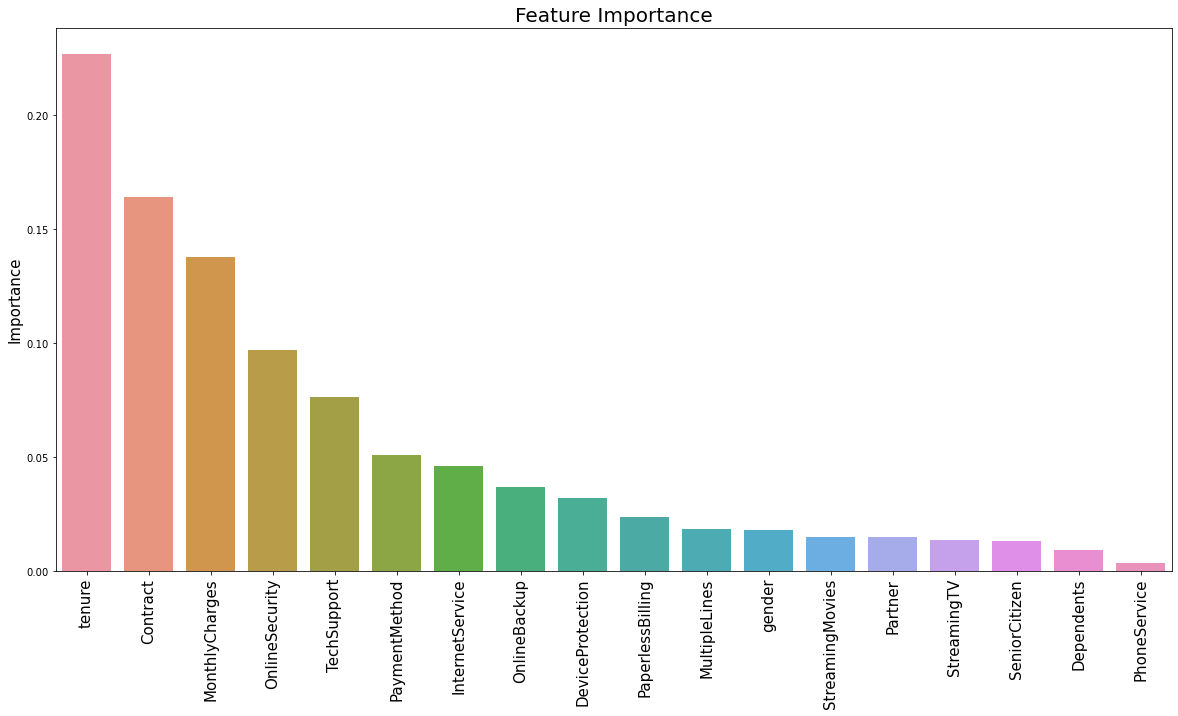

In [304]:
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical', fontsize=15)
sns.barplot(x = 'Attribute', y = 'Importance', data = importance_df)
plt.title('Feature Importance', fontsize=20)
plt.ylabel('Importance', fontsize=15)
plt.xlabel('')

This Feature Importance graph shows that the Tenure, Contract Type, and amount charged are among the strongest predictors of customer churn.

This re confirms what we found previously in the EDA, where we found the influence tenure had in churning as well as those who were on e month-to-month contract were at least 14 times more likely to churn than customers who were not.

### Model Export

We will save our model into a pickle file to use it on the dashboard

In [306]:
import pickle
filename = 'daip5_V2.pkl'
pickle.dump(RFC, open(filename, 'wb')) 

# References

Evolving Systems, 2020. Customer Lifetime Value (CLV) in the telecom industry. [Online] 
Available at: https://www.evolving.com/resources/blog/customer-lifetime-value-clv-in-telecom-industry
[Accessed 16 March 2021].

Hastings, J., n.d.. The value of the wireless customer. [Online] 
Available at: https://www.ncsl.org/print/standcomm/sccomfc/jhastings0807.pdf
[Accessed 16 March 2021].
